# CMPE 258 Assignment 1 Part 1
# Abhishek Bais

# OBJECTIVE
Blackbox Deep Learning

In [10]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [11]:
from fastbook import *

# Check to see if pet is dog or not?

In [6]:
# train from images
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_dog(x): return x[0].islower()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.126211,0.014440,0.004736,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.057148,0.017102,0.004736,00:57


In [8]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

# Try 1:
A cat with a mask during covid19 times

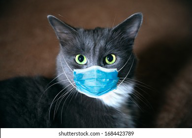

In [10]:
img0 = PILImage.create(uploader.data[0])
img0.to_thumb(192)

# Try 2:
A pup in a cup

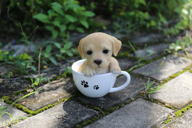

In [11]:
img1 = PILImage.create(uploader.data[0])
img1.to_thumb(192)

In [13]:
# Check for image 1
is_dog,_,probs = learn.predict(img0)
print(f"Is the picture a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is the picture a dog?: False.
Probability it's a dog: 0.000000


# Inference:
Correct, image 1 is a cat not a dog

In [14]:
# Check for image 2
is_dog,_,probs = learn.predict(img1)
print(f"Is the picture a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is the picture a dog?: True.
Probability it's a dog: 0.999985


Correct, image 2 is a dog not a cat

# Image Segmentation

In [12]:
# Segmentation
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.253670,2.401187,00:01


epoch,train_loss,valid_loss,time
0,1.875607,1.614484,00:01
1,1.619775,1.415330,00:01
2,1.460932,1.194371,00:01
3,1.316141,1.070555,00:01
4,1.199221,0.901316,00:01
5,1.087289,0.813529,00:01
6,0.993594,0.777823,00:01
7,0.919534,0.756938,00:01


#Image segmentation Results

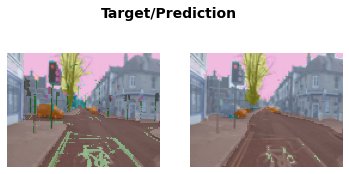

In [19]:
learn.show_results(max_n=2)

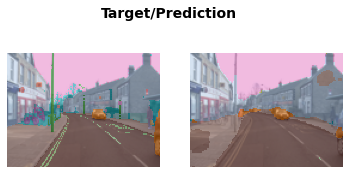

In [16]:
learn.show_results(max_n=2)

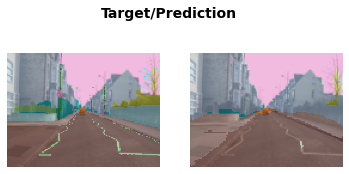

In [18]:
learn.show_results(max_n=2)

# Movie Review System

In [21]:
from fastai.text.all import *
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=16)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.470146,0.426041,0.801760,06:36


epoch,train_loss,valid_loss,accuracy,time
0,0.334115,0.296556,0.866520,12:24
1,0.244661,0.224102,0.908240,12:24
2,0.198957,0.187115,0.929840,12:24
3,0.141513,0.190187,0.932000,12:23


# Test 1

In [22]:
learn_review.predict("I really liked that movie!")

epoch,train_loss,valid_loss,accuracy,time


('pos', tensor(1), tensor([0.1057, 0.8943]))

# Review 1: 4/10 A Nightmare Wakes
Latest Reviews from RottenTomatoes
https://www.rottentomatoes.com/critics/latest_reviews

In [24]:
learn_review.predict("A Nightmare Wakes uniquely melds historical fiction and literary adaptation into one film, but it loses Mary Shelley's spirit in the process.")

('pos', tensor(1), tensor([0.0919, 0.9081]))

# Review 2: 5/5 Ghost Waits
Latest Reviews from RottenTomatoes
https://www.rottentomatoes.com/critics/latest_reviews

In [25]:
learn_review.predict("Filmed in evocative black and white, the film takes hoary tropes and makes them not just fresh, but dynamic with smart direction and a performance from Andrews that hits all the right emotional notes with fine undertones of complexity and heart.")

('pos', tensor(1), tensor([0.0057, 0.9943]))

# Tabular Model

In [26]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [27]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.373957,0.361914,0.829853,00:04
1,0.364786,0.351091,0.839220,00:04
2,0.347825,0.344964,0.841063,00:04


# Collab Model

In [28]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.526371,1.362808,00:00


epoch,train_loss,valid_loss,time
0,1.364610,1.303937,00:00
1,1.257576,1.128838,00:00
2,1.013167,0.849768,00:00
3,0.794428,0.729994,00:00
4,0.687556,0.701513,00:00
5,0.648001,0.690475,00:00
6,0.615254,0.685519,00:00
7,0.605325,0.682866,00:00
8,0.606321,0.682189,00:00
9,0.614475,0.682042,00:00


In [29]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,36.0,55.0,5.0,4.481090
1,95.0,59.0,4.0,3.976895
2,83.0,89.0,3.0,3.774953
3,92.0,35.0,3.5,4.194008
4,76.0,21.0,4.0,3.312464
5,68.0,86.0,4.0,4.109338
6,33.0,34.0,4.0,3.730374
7,18.0,8.0,3.0,3.626408
8,68.0,87.0,3.0,3.466110
